In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
%matplotlib inline

In [5]:
import requests
import pandas as pd

In [6]:
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv"


In [7]:
import pandas as pd
df = pd.read_csv(dataset_url)
print(df)

       Respondent                      MainBranch Hobbyist  \
0               4  I am a developer by profession       No   
1               9  I am a developer by profession      Yes   
2              13  I am a developer by profession      Yes   
3              16  I am a developer by profession      Yes   
4              17  I am a developer by profession      Yes   
...           ...                             ...      ...   
11547       25136  I am a developer by profession      Yes   
11548       25137  I am a developer by profession      Yes   
11549       25138  I am a developer by profession      Yes   
11550       25141  I am a developer by profession      Yes   
11551       25142  I am a developer by profession      Yes   

                                             OpenSourcer  \
0                                                  Never   
1                             Once a month or more often   
2      Less than once a month but more than once per ...   
3              

In [8]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


In [10]:
df.shape

(11552, 85)

# Distribution

Determine how the data is distributed

The column ConvertedComp contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.

Plot the distribution curve for the column ConvertedComp.

C:\Users\Jai Shiv\AppData\Local\Temp\ipykernel_6448\2655246080.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df["ConvertedComp"],bins=20,hist=False)


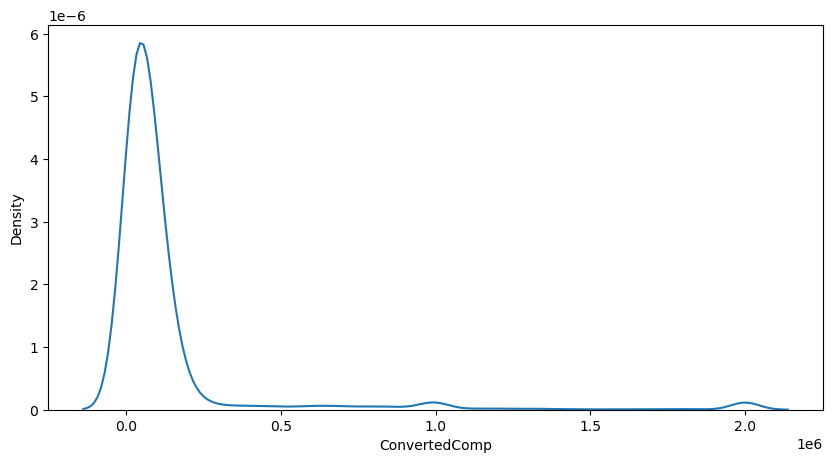

In [11]:
plt.figure(figsize=(10,5))
sns.distplot(a=df["ConvertedComp"],bins=20,hist=False)
plt.show()

Plot the histogram for the column ConvertedComp.

C:\Users\Jai Shiv\AppData\Local\Temp\ipykernel_6448\3397874952.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df["ConvertedComp"],bins=20,kde=False)


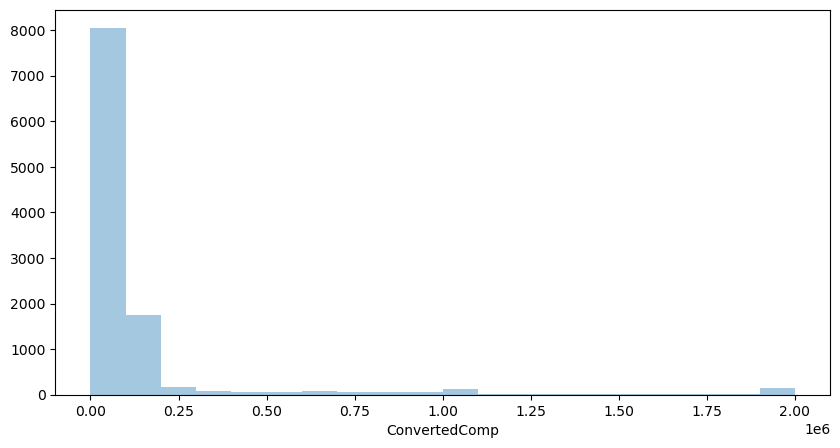

In [12]:
plt.figure(figsize=(10,5))
sns.distplot(a=df["ConvertedComp"],bins=20,kde=False)
plt.show()

In [13]:
df["ConvertedComp"].median()              #median of the column ConvertedComp

57744.0

In [14]:
# How many responders identified themselves only as a Man?
df["Gender"].value_counts()

Man                                                            10626
Woman                                                            737
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

In [16]:
#Find out the median ConvertedComp of responders identified themselves only as a Woman?
woman = df[df["Gender"] == "Woman"]
woman["ConvertedComp"].median()

57636.0

Give the five number summary for the column Age?

In [18]:
df["Age"].describe()

count    11255.000000
mean        30.772394
std          7.392780
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

C:\Users\Jai Shiv\AppData\Local\Temp\ipykernel_6448\1859275398.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df["Age"],bins=20,kde=False)


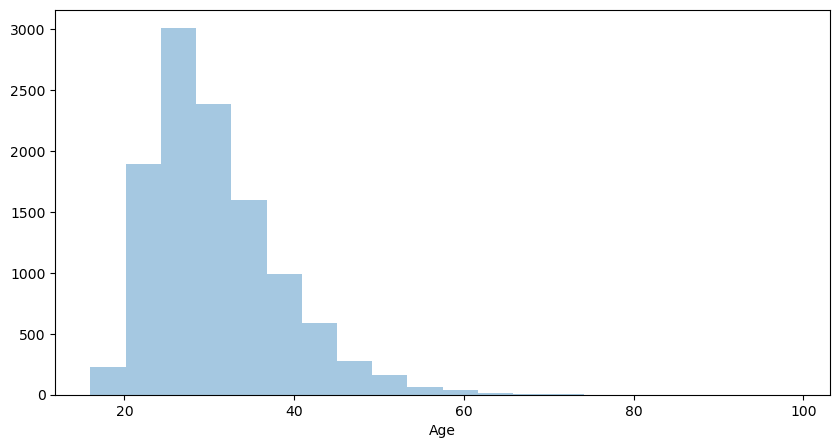

In [19]:
plt.figure(figsize=(10,5))
sns.distplot(a=df["Age"],bins=20,kde=False)
plt.show()

C:\Users\Jai Shiv\AppData\Local\Temp\ipykernel_6448\1859275398.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df["Age"],bins=20,kde=False)


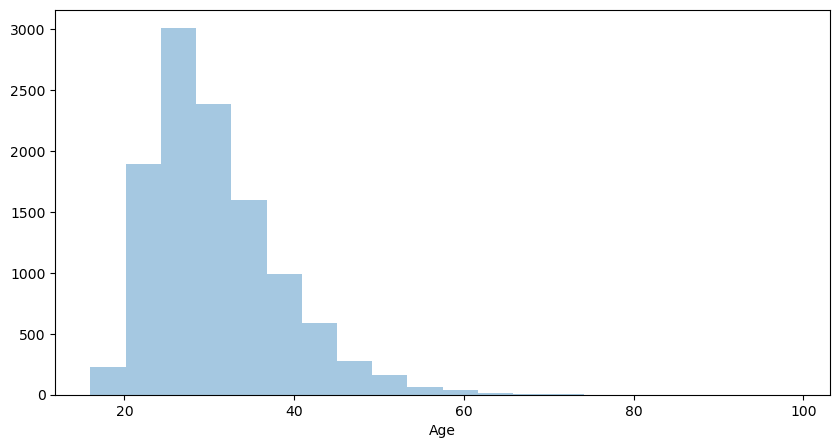

In [20]:
plt.figure(figsize=(10,5))
sns.distplot(a=df["Age"],bins=20,kde=False)
plt.show()

# Outliers

Finding outliers
Find out if outliers exist in the column ConvertedComp using a box plot?

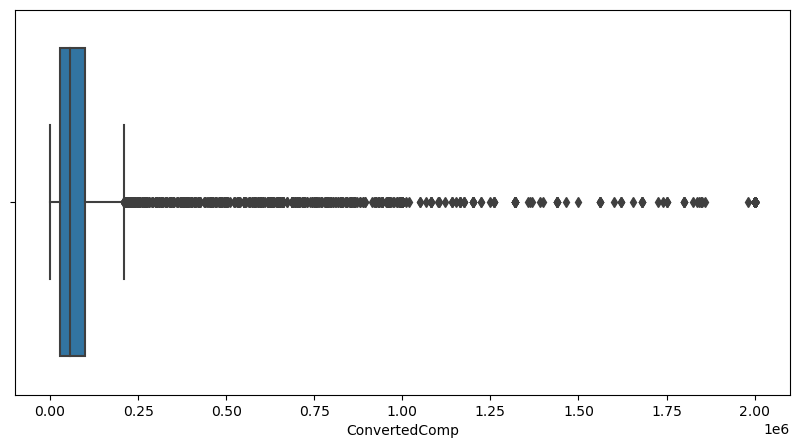

In [21]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df.ConvertedComp, data=df)
plt.show()

Find out the Inter Quartile Range for the column ConvertedComp.

In [22]:
df["ConvertedComp"].describe()

count    1.073000e+04
mean     1.313340e+05
std      2.943245e+05
min      0.000000e+00
25%      2.672700e+04
50%      5.774400e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

In [23]:
df["ConvertedComp"].describe()

count    1.073000e+04
mean     1.313340e+05
std      2.943245e+05
min      0.000000e+00
25%      2.672700e+04
50%      5.774400e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

In [24]:
1.000000e+05 - 2.686800e+04

73132.0

Find out the upper and lower bounds.

In [26]:
Q1 = df["ConvertedComp"].quantile(0.25)
Q3 = df["ConvertedComp"].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

73273.0


Identify how many outliers are there in the ConvertedComp column.


In [27]:
outliers = (df["ConvertedComp"] < (Q1 - 1.5 * IQR)) | (df["ConvertedComp"] > (Q3 + 1.5 * IQR))
outliers.value_counts()

False    10664
True       888
Name: ConvertedComp, dtype: int64

Create a new dataframe by removing the outliers from the ConvertedComp column

In [28]:
less = (df["ConvertedComp"] < (Q1 - 1.5 * IQR))
less.value_counts()

False    11552
Name: ConvertedComp, dtype: int64

In [29]:
more = (df["ConvertedComp"] > (Q3 + 1.5 * IQR))
more.value_counts()

False    10664
True       888
Name: ConvertedComp, dtype: int64

In [30]:
convertedcomp_out = df[~(df["ConvertedComp"] > (Q3 + 1.5 * IQR))]

In [31]:
convertedcomp_out.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy
5,19,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Brazil,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,31.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina,Yes,Too long,Easy


In [32]:
convertedcomp_out["ConvertedComp"].median()

52704.0

In [33]:
convertedcomp_out["ConvertedComp"].mean() 

59878.65515139199

# correlation

Finding correlation
Find the correlation between Age and all other numerical columns.

In [35]:
df.corr()

C:\Users\Jai Shiv\AppData\Local\Temp\ipykernel_6448\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.012384,0.003173,-0.014384,0.009764,0.005103
CompTotal,-0.012384,1.000000,0.001003,0.003533,0.007320,0.007036
ConvertedComp,0.003173,0.001003,1.000000,0.020885,-0.034383,0.103652
WorkWeekHrs,-0.014384,0.003533,0.020885,1.000000,0.026910,0.036887
CodeRevHrs,0.009764,0.007320,-0.034383,0.026910,1.000000,-0.018505
Age,0.005103,0.007036,0.103652,0.036887,-0.018505,1.000000
